In [1]:
from load import load_assets_info, load_events_info
from datetime import date, timedelta, datetime
import os
import pandas as pd
import cv2
import time
import umap
import numpy as np
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px

In [2]:
animeta = {'asset_name':'animeta','contract':"0x18df6c571f6fe9283b87f910e41dc5c8b77b7da5",'start_date':date(2021, 7, 30)}
BAYC = {'asset_name':'BAYC','contract':"0xBC4CA0EdA7647A8aB7C2061c2E118A18a936f13D",'start_date':date(2021, 5, 24)}
meebit = {'asset_name':'meebit','contract':"0x7Bd29408f11D2bFC23c34f18275bBf23bB716Bc7",'start_date':date(2021, 5, 3)}
hashmask = {'asset_name':'hashmask','contract':"0xC2C747E0F7004F9E8817Db2ca4997657a7746928",'start_date':date(2021, 1, 30)}
penguin = {'asset_name':'penguin','contract':"0xBd3531dA5CF5857e7CfAA92426877b022e612cf8",'start_date':date(2021, 7, 23)}
veefriend = {'asset_name':'veefriend','contract':"0xa3AEe8BcE55BEeA1951EF834b99f3Ac60d1ABeeB",'start_date':date(2021, 5, 17)}
coolcat = {'asset_name':'coolcat','contract':"0x1A92f7381B9F03921564a437210bB9396471050C",'start_date':date(2021, 7, 1)}
cranium = {'asset_name':'cranium','contract':"0x85f740958906b317de6ed79663012859067E745B",'start_date':date(2021, 6, 17)}

In [3]:
collections = [animeta]
dataset = []

for collection in collections:
    save_location = str(os.getcwd())+ "\\static\\" + collection['asset_name'] + "\\";
    dataset.append((collection['asset_name'],
                   load_assets_info(save_location, asset_name=collection['asset_name'])
                    #
                   ))

#### Showing the data that exists from downloading

In [4]:
dataset[0][1]

array([{'id': 33619906, 'token_id': '26', 'num_sales': 0, 'background_color': None, 'image_url': 'https://lh3.googleusercontent.com/SEpYcwGMcQo642-2g2Q732AOz3db1lptVZZLHgrr-xaP7mCytYlG-3ZnBqgiZEMSgtYxPNED8t-a-glEHyKbvCFb18ss5Sh6chRxgg', 'image_preview_url': 'https://lh3.googleusercontent.com/SEpYcwGMcQo642-2g2Q732AOz3db1lptVZZLHgrr-xaP7mCytYlG-3ZnBqgiZEMSgtYxPNED8t-a-glEHyKbvCFb18ss5Sh6chRxgg=s250', 'image_thumbnail_url': 'https://lh3.googleusercontent.com/SEpYcwGMcQo642-2g2Q732AOz3db1lptVZZLHgrr-xaP7mCytYlG-3ZnBqgiZEMSgtYxPNED8t-a-glEHyKbvCFb18ss5Sh6chRxgg=s128', 'image_original_url': 'https://gateway.pinata.cloud/ipfs/QmbfuMdX9qiMmKVcDiWmQHYg6sk5yfmoAh7fYbQcvWd9gd/26.png', 'animation_url': None, 'animation_original_url': None, 'name': 'Animeta #26', 'description': 'Animetas is a generative collection of 10101 unique 1/1 NFTs that live on the Ethereum Blockchain. The collection was designed by Gustavo Viselner and generated by cyberh49. Besides being residents of the Animetaverse, and

In [5]:
len(dataset[0][1])

10101

In [6]:
dataset[0][1][0]['collection']['created_date'][:10]

'2021-07-30'

In [7]:
sample = pd.DataFrame.from_dict(dataset[0][1][0], orient='index')
pd.DataFrame.from_dict(dataset[0][1][0], orient='index')

,0
id,33619906
token_id,26
num_sales,0
background_color,None
image_url,https://lh3.googleusercontent.com/SEpYcwGMcQo6...
image_preview_url,https://lh3.googleusercontent.com/SEpYcwGMcQo6...
image_thumbnail_url,https://lh3.googleusercontent.com/SEpYcwGMcQo6...
image_original_url,https://gateway.pinata.cloud/ipfs/QmbfuMdX9qiM...
animation_url,None
animation_original_url,None


In [8]:
sample = sample.T
sample

,id,token_id,num_sales,background_color,image_url,image_preview_url,image_thumbnail_url,image_original_url,animation_url,animation_original_url,...,owner,sell_orders,creator,traits,last_sale,top_bid,listing_date,is_presale,transfer_fee_payment_token,transfer_fee
0,33619906,26,0,None,https://lh3.googleusercontent.com/SEpYcwGMcQo6...,https://lh3.googleusercontent.com/SEpYcwGMcQo6...,https://lh3.googleusercontent.com/SEpYcwGMcQo6...,https://gateway.pinata.cloud/ipfs/QmbfuMdX9qiM...,None,None,...,"{'user': {'username': 'joepayne'}, 'profile_im...",None,"{'user': {'username': 'Animetas_Vault'}, 'prof...","[{'trait_type': 'print', 'value': 'cat', 'disp...",None,None,None,False,None,None


### Getting all traits and doing dimensionality reduction

In [9]:
animetas = dataset[0][1]

In [10]:
animetas[0]

{'id': 33619906,
 'token_id': '26',
 'num_sales': 0,
 'background_color': None,
 'image_url': 'https://lh3.googleusercontent.com/SEpYcwGMcQo642-2g2Q732AOz3db1lptVZZLHgrr-xaP7mCytYlG-3ZnBqgiZEMSgtYxPNED8t-a-glEHyKbvCFb18ss5Sh6chRxgg',
 'image_preview_url': 'https://lh3.googleusercontent.com/SEpYcwGMcQo642-2g2Q732AOz3db1lptVZZLHgrr-xaP7mCytYlG-3ZnBqgiZEMSgtYxPNED8t-a-glEHyKbvCFb18ss5Sh6chRxgg=s250',
 'image_thumbnail_url': 'https://lh3.googleusercontent.com/SEpYcwGMcQo642-2g2Q732AOz3db1lptVZZLHgrr-xaP7mCytYlG-3ZnBqgiZEMSgtYxPNED8t-a-glEHyKbvCFb18ss5Sh6chRxgg=s128',
 'image_original_url': 'https://gateway.pinata.cloud/ipfs/QmbfuMdX9qiMmKVcDiWmQHYg6sk5yfmoAh7fYbQcvWd9gd/26.png',
 'animation_url': None,
 'animation_original_url': None,
 'name': 'Animeta #26',
 'description': 'Animetas is a generative collection of 10101 unique 1/1 NFTs that live on the Ethereum Blockchain. The collection was designed by Gustavo Viselner and generated by cyberh49. Besides being residents of the Animetaverse,

In [11]:
animetas_df = pd.DataFrame.from_records(animetas)
animetas_df.head()

,id,token_id,num_sales,background_color,image_url,image_preview_url,image_thumbnail_url,image_original_url,animation_url,animation_original_url,...,owner,sell_orders,creator,traits,last_sale,top_bid,listing_date,is_presale,transfer_fee_payment_token,transfer_fee
0,33619906,26,0,None,https://lh3.googleusercontent.com/SEpYcwGMcQo6...,https://lh3.googleusercontent.com/SEpYcwGMcQo6...,https://lh3.googleusercontent.com/SEpYcwGMcQo6...,https://gateway.pinata.cloud/ipfs/QmbfuMdX9qiM...,None,None,...,"{'user': {'username': 'joepayne'}, 'profile_im...",None,"{'user': {'username': 'Animetas_Vault'}, 'prof...","[{'trait_type': 'print', 'value': 'cat', 'disp...",None,None,None,False,None,None
1,33619905,23,1,None,https://lh3.googleusercontent.com/AvP0AOt6TzCv...,https://lh3.googleusercontent.com/AvP0AOt6TzCv...,https://lh3.googleusercontent.com/AvP0AOt6TzCv...,https://gateway.pinata.cloud/ipfs/QmbfuMdX9qiM...,None,None,...,"{'user': {'username': 'Shakesbit2021'}, 'profi...",None,"{'user': {'username': 'Animetas_Vault'}, 'prof...","[{'trait_type': 'mask color', 'value': 'blue',...","{'asset': {'token_id': '23', 'decimals': 0}, '...",None,None,False,None,None
2,33619904,25,0,None,https://lh3.googleusercontent.com/w7Lb_atpPMdc...,https://lh3.googleusercontent.com/w7Lb_atpPMdc...,https://lh3.googleusercontent.com/w7Lb_atpPMdc...,https://gateway.pinata.cloud/ipfs/QmbfuMdX9qiM...,None,None,...,"{'user': {'username': 'leftwhaleshark'}, 'prof...",None,"{'user': {'username': 'Animetas_Vault'}, 'prof...","[{'trait_type': 'print', 'value': 'cat', 'disp...",None,None,None,False,None,None
3,33619903,24,1,None,https://lh3.googleusercontent.com/w94VEyam8FWn...,https://lh3.googleusercontent.com/w94VEyam8FWn...,https://lh3.googleusercontent.com/w94VEyam8FWn...,https://gateway.pinata.cloud/ipfs/QmbfuMdX9qiM...,None,None,...,"{'user': {'username': 'EthRangers'}, 'profile_...",None,"{'user': {'username': 'Animetas_Vault'}, 'prof...","[{'trait_type': 'eye type', 'value': 'deep', '...","{'asset': {'token_id': '24', 'decimals': 0}, '...",None,None,False,None,None
4,33619901,27,2,None,https://lh3.googleusercontent.com/SbTfgeMvGuQQ...,https://lh3.googleusercontent.com/SbTfgeMvGuQQ...,https://lh3.googleusercontent.com/SbTfgeMvGuQQ...,https://gateway.pinata.cloud/ipfs/QmbfuMdX9qiM...,None,None,...,"{'user': {'username': 'ET-ian'}, 'profile_img_...",[{'created_date': '2021-09-05T08:28:17.968407'...,"{'user': {'username': 'Animetas_Vault'}, 'prof...","[{'trait_type': 'mouth type', 'value': 'whimsi...","{'asset': {'token_id': '27', 'decimals': 0}, '...",None,None,False,None,None


In [12]:
# make a dict of all trait types e.g. eye type, weapon type, etc. and all values of that trait e.g. blue, submachine gun, etc.
def all_trait_values_dict(dataset):
    all_traits = {}
    for asset in dataset:
        for trait in asset['traits']:
            # Check if the trait type exists in our dictionary, if not add it
            if trait['trait_type'] not in all_traits:
                all_traits[trait['trait_type']] = []
            # Check if the trait type value exists in the list of values of the key otherwise add it
            if trait['value'] not in all_traits[trait['trait_type']]:
                all_traits[trait['trait_type']].append(trait['value'])
    
    return all_traits

In [13]:
trait_values_dict = all_trait_values_dict(animetas)
trait_values_dict

{'print': ['cat',
  'stripes',
  'eight',
  'cross',
  'skull',
  'bunny',
  'checkers',
  'waves',
  'metal',
  'circle',
  'doughnut',
  'star',
  'seven',
  'heart',
  'me',
  'polka dots',
  'joystick',
  'dots',
  'number',
  'animetas',
  'flag',
  'alien',
  'planet',
  'speed'],
 'type': ['human',
  'child',
  'punk',
  'alien',
  'black ninja',
  'inmate',
  'Galaxy Police',
  'cowgirl',
  'cowboy',
  'Blockchain Zombie',
  'police',
  'white ninja',
  'robot',
  'animighty #10',
  'animighty #4',
  'hologram',
  'animighty #1',
  'animighty #5',
  'animighty #8',
  'animighty #6',
  'animighty #3',
  'animighty #2',
  'animighty #7',
  'animighty #9'],
 'overshirt': ['tee',
  'flashlight armor',
  'zipper hoodie',
  'jacket',
  'poncho',
  'flashlight turtleneck',
  'prisoner uniform',
  'short-sleeve sweater',
  'punk jacket',
  'zipper sweater',
  'sweater',
  'laser sweater',
  'overall',
  'electrobe',
  'button jacket',
  'coat',
  'trench coat',
  'corset',
  'cowboy po

In [14]:
# make a list of all unique trait types + values
def list_all_trait_values(trait_values_dict):
    trait_value_list = []
    for trait_type in trait_values_dict:
        for value in trait_values_dict[trait_type]:
            trait_value_list.append(str(trait_type)+"_"+str(value))
    return trait_value_list

In [15]:
trait_values_dict.keys()

dict_keys(['print', 'type', 'overshirt', 'eye type', 'eye accessory color', 'shirt', 'mouth type', 'shirt color', 'eye accessory ', 'hair style', 'overshirt color', 'hair color', 'mask color', 'mask type', 'head accessory', 'skin', 'eye color', 'weapon', 'facial hair type', 'facial hair color', 'arm accessory', 'vest color', 'vest', 'shoulder accessory', 'neck accessory', 'skin weapon', 'head type', 'Name', 'flashlight color', 'pockets', 'shirt material', 'name', 'backpack', 'backpack color', 'shirt print', 'facial accessory', 'eye accessory', 'shirt color ', 'mouthpiece', 'color', 'ID', 'NFT badge', 'Element'])

In [16]:
trait_value_list = list_all_trait_values(trait_values_dict)
trait_value_list

['print_cat',
 'print_stripes',
 'print_eight',
 'print_cross',
 'print_skull',
 'print_bunny',
 'print_checkers',
 'print_waves',
 'print_metal',
 'print_circle',
 'print_doughnut',
 'print_star',
 'print_seven',
 'print_heart',
 'print_me',
 'print_polka dots',
 'print_joystick',
 'print_dots',
 'print_number',
 'print_animetas',
 'print_flag',
 'print_alien',
 'print_planet',
 'print_speed',
 'type_human',
 'type_child',
 'type_punk',
 'type_alien',
 'type_black ninja',
 'type_inmate',
 'type_Galaxy Police',
 'type_cowgirl',
 'type_cowboy',
 'type_Blockchain Zombie',
 'type_police',
 'type_white ninja',
 'type_robot',
 'type_animighty #10',
 'type_animighty #4',
 'type_hologram',
 'type_animighty #1',
 'type_animighty #5',
 'type_animighty #8',
 'type_animighty #6',
 'type_animighty #3',
 'type_animighty #2',
 'type_animighty #7',
 'type_animighty #9',
 'overshirt_tee',
 'overshirt_flashlight armor',
 'overshirt_zipper hoodie',
 'overshirt_jacket',
 'overshirt_poncho',
 'overshirt_f

In [17]:
animetas[1]['last_sale']['total_price']

'690000000000000000'

In [18]:
# make a dict of all assets and their trait types + value for that trait or 'none'
# includes number of traits
def asset_traits_dict(dataset, trait_values_dict):
    assets_traits = {}
    for asset in dataset:
        if asset['name'] not in assets_traits:
            assets_traits[asset['name']] = {key: None for key in trait_values_dict.keys()}
        for trait in asset['traits']:
            assets_traits[asset['name']][trait['trait_type']] = trait['value']
        assets_traits[asset['name']]['trait_count'] = len(asset['traits'])
    return assets_traits

In [19]:
assets_traits = asset_traits_dict(animetas, trait_values_dict)
assets_traits

{'Animeta #26': {'print': 'stripes',
  'type': 'human',
  'overshirt': 'tee',
  'eye type': 'A',
  'eye accessory color': 'green',
  'shirt': 'long-sleeve shirt',
  'mouth type': 'teeth grin',
  'shirt color': 'multicolor',
  'eye accessory ': 'single tractor beam',
  'hair style': 'messy',
  'overshirt color': 'red',
  'hair color': 'purple',
  'mask color': None,
  'mask type': None,
  'head accessory': None,
  'skin': None,
  'eye color': None,
  'weapon': None,
  'facial hair type': None,
  'facial hair color': None,
  'arm accessory': None,
  'vest color': None,
  'vest': None,
  'shoulder accessory': None,
  'neck accessory': None,
  'skin weapon': None,
  'head type': None,
  'Name': None,
  'flashlight color': None,
  'pockets': None,
  'shirt material': None,
  'name': None,
  'backpack': None,
  'backpack color': None,
  'shirt print': None,
  'facial accessory': None,
  'eye accessory': None,
  'shirt color ': None,
  'mouthpiece': None,
  'color': None,
  'ID': None,
  'NFT

In [20]:
animetas_traits = pd.DataFrame.from_dict(assets_traits,orient='index')
animetas_traits.head()

,print,type,overshirt,eye type,eye accessory color,shirt,mouth type,shirt color,eye accessory,hair style,...,shirt print,facial accessory,eye accessory,shirt color,mouthpiece,color,ID,NFT badge,Element,trait_count
Animeta #26,stripes,human,tee,A,green,long-sleeve shirt,teeth grin,multicolor,single tractor beam,messy,...,None,None,None,None,None,None,None,None,None,13
Animeta #23,eight,human,None,almond,red,tee,masked,multicolor,goggles,long spiky,...,None,None,None,None,None,None,None,None,None,13
Animeta #25,stripes,human,tee,A,green,long-sleeve shirt,tounge out,multicolor,electrowl,loose curls,...,None,None,None,None,None,None,None,None,None,13
Animeta #24,None,human,None,deep,None,None,closed,None,None,short thick,...,None,None,None,None,None,None,None,None,None,7
Animeta #27,None,human,None,full squint,None,None,whimsical grin,None,None,bangs,...,None,None,None,None,None,None,None,None,None,7


In [21]:
animetas_traits.loc['Animeta #6114']

print                                  None
type                                   punk
overshirt                              None
eye type                            regular
eye accessory color                    None
shirt                                   bra
mouth type                          vampire
shirt color                          purple
eye accessory                          None
hair style                      short curly
overshirt color                        None
hair color                           purple
mask color                             None
mask type                              None
head accessory         double skull earring
skin                                   None
eye color                              blue
weapon                                 None
facial hair type                       None
facial hair color                      None
arm accessory                      arm ring
vest color                            green
vest                            

In [22]:
# make a dict of all assets and their one hot equivalent of all their trait types and values
# DOES NOT include number of traits
def asset_traits_one_hot_dict(dataset, trait_value_list):
    assets_onehot = {}
    for asset in dataset:
        if asset['name'] not in assets_onehot:
            assets_onehot[asset['name']] = {key: 0 for key in trait_value_list}
        for trait in asset['traits']:
            assets_onehot[asset['name']][str(trait['trait_type'])+"_"+str(trait['value'])] = 1
    return assets_onehot

In [23]:
start = time.time()
assets_onehot = asset_traits_one_hot_dict(animetas, trait_value_list)
print(time.time() - start)

0.7260334491729736


In [24]:
animetas_onehot = pd.DataFrame.from_dict(assets_onehot,orient='index')
animetas_onehot.head()

,print_cat,print_stripes,print_eight,print_cross,print_skull,print_bunny,print_checkers,print_waves,print_metal,print_circle,...,ID_A01,ID_A09,ID_A08,ID_A10,NFT badge_artist's choice,Element_Earth,Element_Water,Element_Lightning,Element_Air,Element_Fire
Animeta #26,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Animeta #23,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Animeta #25,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Animeta #24,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Animeta #27,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [25]:
animetas

array([{'id': 33619906, 'token_id': '26', 'num_sales': 0, 'background_color': None, 'image_url': 'https://lh3.googleusercontent.com/SEpYcwGMcQo642-2g2Q732AOz3db1lptVZZLHgrr-xaP7mCytYlG-3ZnBqgiZEMSgtYxPNED8t-a-glEHyKbvCFb18ss5Sh6chRxgg', 'image_preview_url': 'https://lh3.googleusercontent.com/SEpYcwGMcQo642-2g2Q732AOz3db1lptVZZLHgrr-xaP7mCytYlG-3ZnBqgiZEMSgtYxPNED8t-a-glEHyKbvCFb18ss5Sh6chRxgg=s250', 'image_thumbnail_url': 'https://lh3.googleusercontent.com/SEpYcwGMcQo642-2g2Q732AOz3db1lptVZZLHgrr-xaP7mCytYlG-3ZnBqgiZEMSgtYxPNED8t-a-glEHyKbvCFb18ss5Sh6chRxgg=s128', 'image_original_url': 'https://gateway.pinata.cloud/ipfs/QmbfuMdX9qiMmKVcDiWmQHYg6sk5yfmoAh7fYbQcvWd9gd/26.png', 'animation_url': None, 'animation_original_url': None, 'name': 'Animeta #26', 'description': 'Animetas is a generative collection of 10101 unique 1/1 NFTs that live on the Ethereum Blockchain. The collection was designed by Gustavo Viselner and generated by cyberh49. Besides being residents of the Animetaverse, and

In [26]:
animetas[0]

{'id': 33619906,
 'token_id': '26',
 'num_sales': 0,
 'background_color': None,
 'image_url': 'https://lh3.googleusercontent.com/SEpYcwGMcQo642-2g2Q732AOz3db1lptVZZLHgrr-xaP7mCytYlG-3ZnBqgiZEMSgtYxPNED8t-a-glEHyKbvCFb18ss5Sh6chRxgg',
 'image_preview_url': 'https://lh3.googleusercontent.com/SEpYcwGMcQo642-2g2Q732AOz3db1lptVZZLHgrr-xaP7mCytYlG-3ZnBqgiZEMSgtYxPNED8t-a-glEHyKbvCFb18ss5Sh6chRxgg=s250',
 'image_thumbnail_url': 'https://lh3.googleusercontent.com/SEpYcwGMcQo642-2g2Q732AOz3db1lptVZZLHgrr-xaP7mCytYlG-3ZnBqgiZEMSgtYxPNED8t-a-glEHyKbvCFb18ss5Sh6chRxgg=s128',
 'image_original_url': 'https://gateway.pinata.cloud/ipfs/QmbfuMdX9qiMmKVcDiWmQHYg6sk5yfmoAh7fYbQcvWd9gd/26.png',
 'animation_url': None,
 'animation_original_url': None,
 'name': 'Animeta #26',
 'description': 'Animetas is a generative collection of 10101 unique 1/1 NFTs that live on the Ethereum Blockchain. The collection was designed by Gustavo Viselner and generated by cyberh49. Besides being residents of the Animetaverse,

In [27]:
last_sale_prices = []
for asset in animetas:
    if asset['last_sale']:
        last_sale_prices.append(int(asset['last_sale']['total_price']))
    else:
        last_sale_prices.append(0)

amin, amax = min(last_sale_prices), max(last_sale_prices)
for i, val in enumerate(last_sale_prices):
    last_sale_prices[i] = (val-amin) / (amax-amin)

In [28]:
def last_price(row):
    if row['last_sale']:
        return int(row['last_sale']['total_price'])*(10**-18)
    else:
        return 0

In [29]:
animetas_df['last_price'] = animetas_df.apply(lambda row: last_price(row), axis = 1) # col for last_price

In [30]:
animetas_df.head()

,id,token_id,num_sales,background_color,image_url,image_preview_url,image_thumbnail_url,image_original_url,animation_url,animation_original_url,...,sell_orders,creator,traits,last_sale,top_bid,listing_date,is_presale,transfer_fee_payment_token,transfer_fee,last_price
0,33619906,26,0,None,https://lh3.googleusercontent.com/SEpYcwGMcQo6...,https://lh3.googleusercontent.com/SEpYcwGMcQo6...,https://lh3.googleusercontent.com/SEpYcwGMcQo6...,https://gateway.pinata.cloud/ipfs/QmbfuMdX9qiM...,None,None,...,None,"{'user': {'username': 'Animetas_Vault'}, 'prof...","[{'trait_type': 'print', 'value': 'cat', 'disp...",None,None,None,False,None,None,0.00
1,33619905,23,1,None,https://lh3.googleusercontent.com/AvP0AOt6TzCv...,https://lh3.googleusercontent.com/AvP0AOt6TzCv...,https://lh3.googleusercontent.com/AvP0AOt6TzCv...,https://gateway.pinata.cloud/ipfs/QmbfuMdX9qiM...,None,None,...,None,"{'user': {'username': 'Animetas_Vault'}, 'prof...","[{'trait_type': 'mask color', 'value': 'blue',...","{'asset': {'token_id': '23', 'decimals': 0}, '...",None,None,False,None,None,0.69
2,33619904,25,0,None,https://lh3.googleusercontent.com/w7Lb_atpPMdc...,https://lh3.googleusercontent.com/w7Lb_atpPMdc...,https://lh3.googleusercontent.com/w7Lb_atpPMdc...,https://gateway.pinata.cloud/ipfs/QmbfuMdX9qiM...,None,None,...,None,"{'user': {'username': 'Animetas_Vault'}, 'prof...","[{'trait_type': 'print', 'value': 'cat', 'disp...",None,None,None,False,None,None,0.00
3,33619903,24,1,None,https://lh3.googleusercontent.com/w94VEyam8FWn...,https://lh3.googleusercontent.com/w94VEyam8FWn...,https://lh3.googleusercontent.com/w94VEyam8FWn...,https://gateway.pinata.cloud/ipfs/QmbfuMdX9qiM...,None,None,...,None,"{'user': {'username': 'Animetas_Vault'}, 'prof...","[{'trait_type': 'eye type', 'value': 'deep', '...","{'asset': {'token_id': '24', 'decimals': 0}, '...",None,None,False,None,None,0.32
4,33619901,27,2,None,https://lh3.googleusercontent.com/SbTfgeMvGuQQ...,https://lh3.googleusercontent.com/SbTfgeMvGuQQ...,https://lh3.googleusercontent.com/SbTfgeMvGuQQ...,https://gateway.pinata.cloud/ipfs/QmbfuMdX9qiM...,None,None,...,[{'created_date': '2021-09-05T08:28:17.968407'...,"{'user': {'username': 'Animetas_Vault'}, 'prof...","[{'trait_type': 'mouth type', 'value': 'whimsi...","{'asset': {'token_id': '27', 'decimals': 0}, '...",None,None,False,None,None,0.90


In [31]:
filtered_df = animetas_df.loc[animetas_df['last_price'] != 0]

In [32]:
len(filtered_df)

7927

#### Dictionary of assets + sales for each

In [12]:
# make a dict of all trait types e.g. eye type, weapon type, etc. and all values of that trait e.g. blue, submachine gun, etc.
def all_assets_sales_dict(sales):
    all_tokens = {}
    for asset in dataset:
        # Check if the token_id exists in our dictionary, if not add it
        if asset['token_id'] not in all_tokens:
            all_tokens[trait[asset['token_id']]] = []
        # Check if the trait type value exists in the list of values of the key otherwise add it
        if trait['value'] not in all_traits[trait['trait_type']]:
            all_traits[trait['trait_type']].append(trait['value'])
    
    return all_traits

In [13]:
trait_values_dict = all_trait_values_dict(animetas)
trait_values_dict

{'print': ['cat',
  'stripes',
  'eight',
  'cross',
  'skull',
  'bunny',
  'checkers',
  'waves',
  'metal',
  'circle',
  'doughnut',
  'star',
  'seven',
  'heart',
  'me',
  'polka dots',
  'joystick',
  'dots',
  'number',
  'animetas',
  'flag',
  'alien',
  'planet',
  'speed'],
 'type': ['human',
  'child',
  'punk',
  'alien',
  'black ninja',
  'inmate',
  'Galaxy Police',
  'cowgirl',
  'cowboy',
  'Blockchain Zombie',
  'police',
  'white ninja',
  'robot',
  'animighty #10',
  'animighty #4',
  'hologram',
  'animighty #1',
  'animighty #5',
  'animighty #8',
  'animighty #6',
  'animighty #3',
  'animighty #2',
  'animighty #7',
  'animighty #9'],
 'overshirt': ['tee',
  'flashlight armor',
  'zipper hoodie',
  'jacket',
  'poncho',
  'flashlight turtleneck',
  'prisoner uniform',
  'short-sleeve sweater',
  'punk jacket',
  'zipper sweater',
  'sweater',
  'laser sweater',
  'overall',
  'electrobe',
  'button jacket',
  'coat',
  'trench coat',
  'corset',
  'cowboy po

### PCA

In [33]:
filtered_df['bin'] = pd.qcut(filtered_df['last_price'], q=8, precision=0, duplicates='drop')
filtered_df['bin_cats'] = filtered_df['bin'].cat.codes
filtered_df['bin'] = filtered_df['bin'].astype(str)

<ipython-input-33-4d7c53bbc257>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['bin'] = pd.qcut(filtered_df['last_price'], q=8, precision=0, duplicates='drop')
<ipython-input-33-4d7c53bbc257>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['bin_cats'] = filtered_df['bin'].cat.codes
<ipython-input-33-4d7c53bbc257>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in

In [34]:
print(filtered_df['bin'].unique())

['(0.6, 0.8]' '(0.3, 0.4]' '(0.8, 1.0]' '(0.2, 0.3]' '(0.4, 0.5]'
 '(1.0, 50.0]' '(0.5, 0.6]' '(-0.060000000000000005, 0.2]']


In [35]:
%%time
embedding = umap.UMAP(n_neighbors=40).fit_transform(animetas_onehot)

Wall time: 18.3 s


In [36]:
filtered_df['x'] = 0.0
filtered_df['y'] = 0.0

for index, row in enumerate(embedding):
    filtered_df.at[index,'x'] = row[0]
    filtered_df.at[index,'y'] = row[1]

<ipython-input-36-a2165099d995>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['x'] = 0.0
<ipython-input-36-a2165099d995>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['y'] = 0.0
C:\Users\ajduf\anaconda3\lib\site-packages\pandas\core\frame.py:3281: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  s

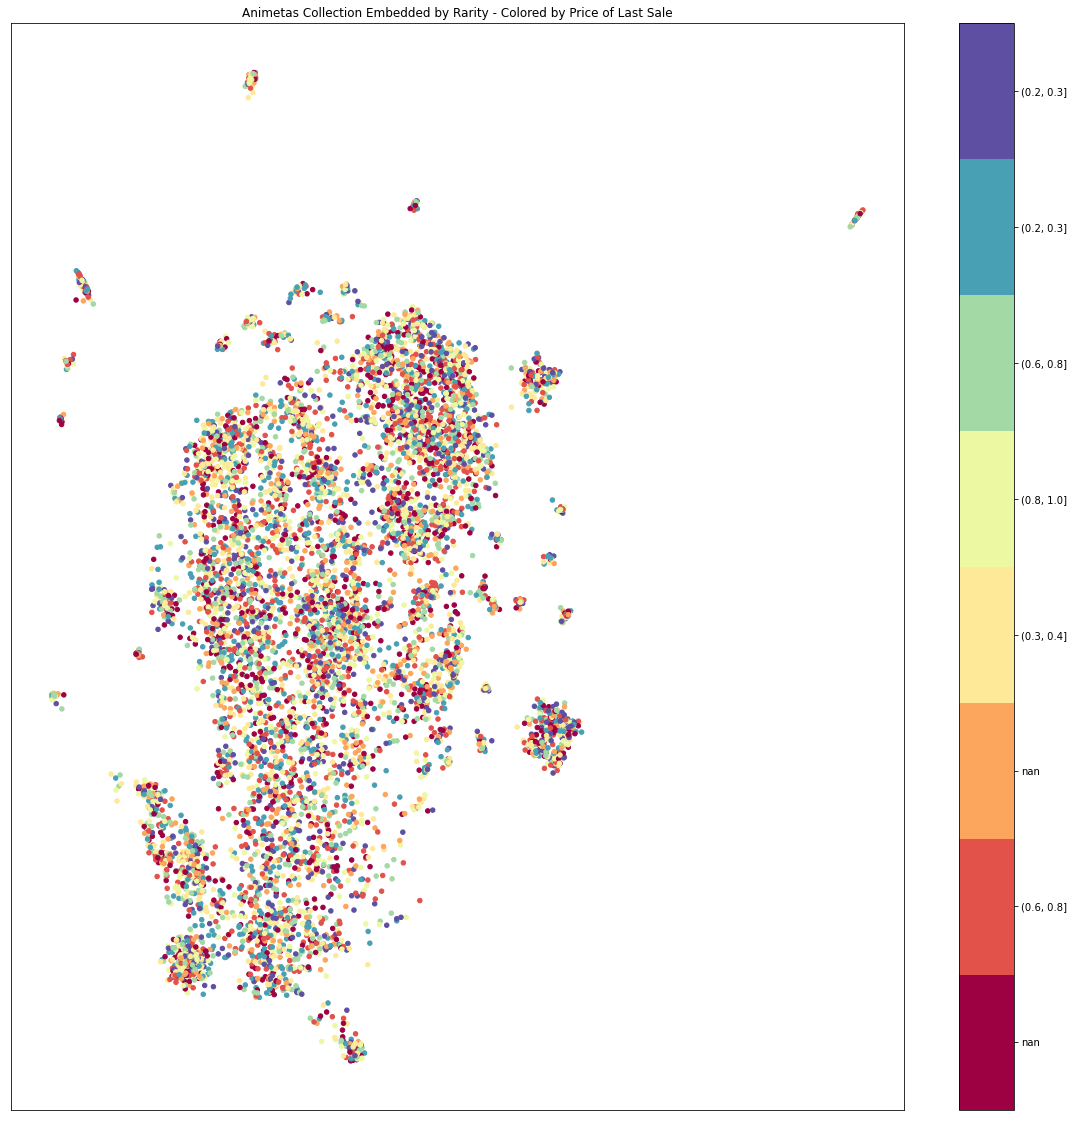

In [37]:
fig, ax = plt.subplots(1, figsize=(20, 20))
plt.scatter(*embedding.T, s=20, c=filtered_df['bin_cats'], cmap='Spectral', alpha=1.0)
plt.setp(ax, xticks=[], yticks=[])
plt.title('Animetas Collection Embedded by Rarity - Colored by Price of Last Sale');
cbar = plt.colorbar(boundaries=np.arange(9)-0.5)
cbar.set_ticks(np.arange(8))
cbar.set_ticklabels(filtered_df['bin'])

In [38]:
from ast import literal_eval
import plotly.offline as py
py.init_notebook_mode(connected = True)
import plotly.graph_objs as go
colors = ['rgb(0,31,63)', 'rgb(255,133,27)', 'rgb(255,65,54)', 'rgb(0,116,217)', 'rgb(133,20,75)', 'rgb(57,204,204)',
'rgb(240,18,190)']
data_graph = []
for no, name in enumerate(np.unique(filtered_df['bin'])):
    graph = go.Scatter3d(
    x = filtered_df[filtered_df['bin'] == name]["x"],
    y = filtered_df[filtered_df['bin'] == name]["y"],
    z = filtered_df[filtered_df['bin'] == name]["bin"],
    name = filtered_df['name'][no],
    mode = 'markers',
    marker = dict(
        size = 12,
        line = dict(
            color = '#%02x%02x%02x' % literal_eval(colors[no][3:]),
            width = 0.5
            ),
        opacity = 0.5
        )
    )
    data_graph.append(graph)
    
layout = go.Layout(
    scene = dict(
        camera = dict(
            eye = dict(
            x = 0.5,
            y = 0.5,
            z = 0.5
            )
        )
    ),
    margin = dict(
        l = 0,
        r = 0,
        b = 0,
        t = 0
    )
)
fig = go.Figure(data = data_graph, layout = layout)
py.iplot(fig, filename = '3d-scatter')

TypeError: '<' not supported between instances of 'float' and 'str'

In [39]:
def plot_3d(component1,component2,component3,labels):
    fig = go.Figure(data=[go.Scatter3d(
        x=component1,
        y=component2,
        z=component3,
        mode='markers',
        marker=dict(
            size=10,
            color=labels,                # set color to an array/list of desired values
            colorscale='Rainbow',   # choose a colorscale
            opacity=1,
            line_width=1
        )
    )])
# tight layout
    fig.update_layout(margin=dict(l=50,r=50,b=50,t=50),width=1800,height=1000)
    fig.layout.template = 'plotly_dark'
    
    fig.show()

In [40]:
start = time.time()
reducer = umap.UMAP(random_state=42, n_neighbors=30, n_components=3)
embedding = reducer.fit_transform(animetas_onehot)
print('Duration: {} seconds'.format(time.time() - start))

Duration: 12.696242332458496 seconds


In [41]:
plot_3d(reducer.embedding_[:, 0],reducer.embedding_[:, 1],reducer.embedding_[:, 2],list(filtered_df['bin_cats']))